In [148]:
%pip install pandas
%pip install matplotlib
%pip install seaborn as sns
%pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut


In [150]:
health_file_1_path = '../national_obesity_data/grouped_data_1.csv'  
health_file_2_path = '../national_obesity_data/grouped_data_2.csv'  
health_file_3_path = '../national_obesity_data/grouped_data_3.csv'  
health_file_4_path = '../national_obesity_data/grouped_data_4.csv'  
stock_file_path = '../Datathon_Data/all_stock_and_etfs.csv'  

two_or_more_races_path = '../adult_ethnicity_health_data/2ormoreraces_obesity.csv'
american_indian_alaskan_path = '../adult_ethnicity_health_data/AmericanIndianAlaskaNative_obesity.csv'
asian_path = '../adult_ethnicity_health_data/Asian_obesity.csv'
hawaiian_pacific_islander_path = '../adult_ethnicity_health_data/HawaiianPacificIslander_obesity.csv'
hispanic_path = '../adult_ethnicity_health_data/Hispanic_obesity.csv'
non_hispanic_black_path = '../adult_ethnicity_health_data/Non-HispanicBlack_obesity.csv'
non_hispanic_white_path = '../adult_ethnicity_health_data/Non-HispanicWhite_obesity.csv'

## File Path Descriptions:

* health_file_1_path: Percent of students in grades 9-12 who have obesity
* health_file_2_path: Percent of students in grades 9-12 who have an overweight classification
* health_file_3_path: Percent of adults aged 18 years and older who have obesity
* health_file_4_path: Percent of adults aged 18 years and older who have an overweight classification

In [151]:
health_1_df = pd.read_csv(health_file_1_path, low_memory=False)
health_1_df.rename(columns={'YearStart': 'Year'}, inplace=True)
health_1_df

,Year,LocationDesc,Weighted_Data_Value
0,2001,National,10.777437
1,2003,National,12.199633
2,2005,National,13.139717
3,2007,National,13.075449
4,2009,National,11.931245
5,2011,National,13.146012
6,2013,National,13.782396
7,2015,National,13.943990
8,2017,National,14.863031
9,2019,National,15.455182


In [152]:
health_2_df = pd.read_csv(health_file_2_path, low_memory=False)
health_3_df = pd.read_csv(health_file_3_path, low_memory=False)
health_4_df = pd.read_csv(health_file_4_path, low_memory=False)

health_2_df.rename(columns={'YearStart': 'Year'}, inplace=True)
health_3_df.rename(columns={'YearStart': 'Year'}, inplace=True)
health_4_df.rename(columns={'YearStart': 'Year'}, inplace=True)

print(health_2_df)
print(health_3_df)
print(health_4_df)

   Year LocationDesc  Weighted_Data_Value
0  2001     National            13.748787
1  2003     National            14.863256
2  2005     National            15.730217
3  2007     National            15.751022
4  2009     National            15.778499
5  2011     National            15.306942
6  2013     National            16.661326
7  2015     National            16.104525
8  2017     National            15.730232
9  2019     National            16.145239
    Year LocationDesc  Weighted_Data_Value
0   2011     National            27.403164
1   2012     National            27.676900
2   2013     National            28.253890
3   2014     National            28.846556
4   2015     National            28.789366
5   2016     National            29.515772
6   2017     National            30.048435
7   2018     National            30.876317
8   2019     National            31.302005
9   2020     National            31.763344
10  2021     National            32.853809
11  2022     National 

In [153]:
stock_df = pd.read_csv(stock_file_path)
stock_df['Date-Time'] = pd.to_datetime(stock_df['Date-Time'])
stock_df['Year'] = stock_df['Date-Time'].dt.year
stock_df = stock_df[['Year', 'Ticker_Symbol', 'Close']]
stock_df.dropna(inplace=True)

stock_df

,Year,Ticker_Symbol,Close
0,2024,HRL,29.44
1,2024,HRL,28.99
2,2024,HRL,29.11
3,2024,HRL,28.80
4,2024,HRL,28.72
...,...,...,...
163552,1999,ALG,9.50
163553,1999,ALG,9.31
163554,1999,ALG,9.19
163555,1999,ALG,8.88


In [154]:
unique_symbols = stock_df['Ticker_Symbol'].unique()
print("Unique Ticker Symbols:")
print(len(unique_symbols))

unique_symbols

Unique Ticker Symbols:
29


array(['HRL', 'VOO', 'ADM', 'AGCO', 'DIA', 'PEP', 'QSR', 'TSCO', 'ONEQ',
       'PPC', 'CAG', 'DRI', 'HSY', 'CAT', 'SBUX', 'CMG', 'COKE', 'CNHI',
       'SPY', 'DE', 'TSN', 'GIS', 'WEN', 'YUM', 'VMI', 'MCD', 'SAP',
       'DPZ', 'ALG'], dtype=object)

In [155]:
stock_df = stock_df.groupby(['Year', 'Ticker_Symbol']).mean().reset_index()

stock_df

,Year,Ticker_Symbol,Close
0,1999,ADM,12.453953
1,1999,AGCO,12.470930
2,1999,ALG,9.586512
3,1999,CAG,23.396744
4,1999,CAT,49.461860
...,...,...,...
693,2024,TSN,54.222353
694,2024,VMI,230.129706
695,2024,VOO,447.759459
696,2024,WEN,19.127059


## Convert Stocks to Synthetic ETFs

In [156]:
import os 

synthetic_etfs = {
    "Food_Beverage_ETF": ["HRL", "ADM", "PEP", "CAG", "HSY", "TSN", "GIS", "COKE", "PPC"],
    "Restaurant_FastFood_ETF": ["QSR", "DRI", "SBUX", "CMG", "WEN", "YUM", "MCD", "DPZ"],
    "Retail_ETF": ["TSCO"],
    "Agri_Machinery_ETF": ["AGCO", "CAT", "DE", "CNHI", "VMI", "ALG"],
    "Investment_Funds_ETF": ["VOO", "DIA", "ONEQ", "SPY"]
}

def calculate_etf_price(year, etf_companies):
    etf_price = stock_df[(stock_df["Year"] == year) & (stock_df["Ticker_Symbol"].isin(etf_companies))]["Close"].sum()
    return etf_price

years = stock_df["Year"].unique()
etf_prices = []

for year in years:
    for etf_name, companies in synthetic_etfs.items():
        etf_price = calculate_etf_price(year, companies)
        etf_prices.append({"Year": year, "Ticker_Symbol": etf_name, "Close": etf_price})

etf_df = pd.DataFrame(etf_prices)

## Merge ETFs with National Metrics

In [157]:
def merge_datasets(health_df, stock_df):
    stock_df_pivot = stock_df.pivot(index='Year', columns='Ticker_Symbol', values='Close').reset_index()
    merged_data = pd.merge(health_df, stock_df_pivot, on='Year', how='inner')
    return merged_data

merged_1_df = merge_datasets(health_1_df, etf_df)
merged_2_df = merge_datasets(health_2_df, etf_df)
merged_3_df = merge_datasets(health_3_df, etf_df)
merged_4_df = merge_datasets(health_4_df, etf_df)

print(merged_2_df)
print(merged_3_df)
print(merged_4_df)

merged_1_df

   Year LocationDesc  Weighted_Data_Value  Agri_Machinery_ETF  \
0  2001     National            13.748787          130.227460   
1  2003     National            14.863256          162.217698   
2  2005     National            15.730217          209.005397   
3  2007     National            15.751022          335.076215   
4  2009     National            15.778499          192.298016   
5  2011     National            15.306942          344.579008   
6  2013     National            16.661326          429.103965   
7  2015     National            16.104525          390.638889   
8  2017     National            15.730232          556.947729   
9  2019     National            16.145239          613.085476   

   Food_Beverage_ETF  Investment_Funds_ETF  Restaurant_FastFood_ETF  \
0         274.028024            221.964567               149.906371   
1         296.241048            264.534740               117.394341   
2         345.688517            309.117206               197.923468   


,Year,LocationDesc,Weighted_Data_Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
0,2001,National,10.777437,130.227460,274.028024,221.964567,149.906371,19.274291
1,2003,National,12.199633,162.217698,296.241048,264.534740,117.394341,41.563901
2,2005,National,13.139717,209.005397,345.688517,309.117206,197.923468,46.497044
3,2007,National,13.075449,335.076215,381.619233,380.833298,298.694042,48.051913
4,2009,National,11.931245,192.298016,298.652738,256.591413,228.613929,42.359365
5,2011,National,13.146012,344.579008,330.002440,409.900663,541.906769,62.210835
6,2013,National,13.782396,429.103965,431.914014,544.478210,747.108615,100.741679
7,2015,National,13.943990,390.638889,606.007917,765.388137,1125.896825,87.509544
8,2017,National,14.863031,556.947729,692.402131,932.296721,1002.210837,63.274223
9,2019,National,15.455182,613.085476,812.510000,1134.157936,1573.749405,98.228016


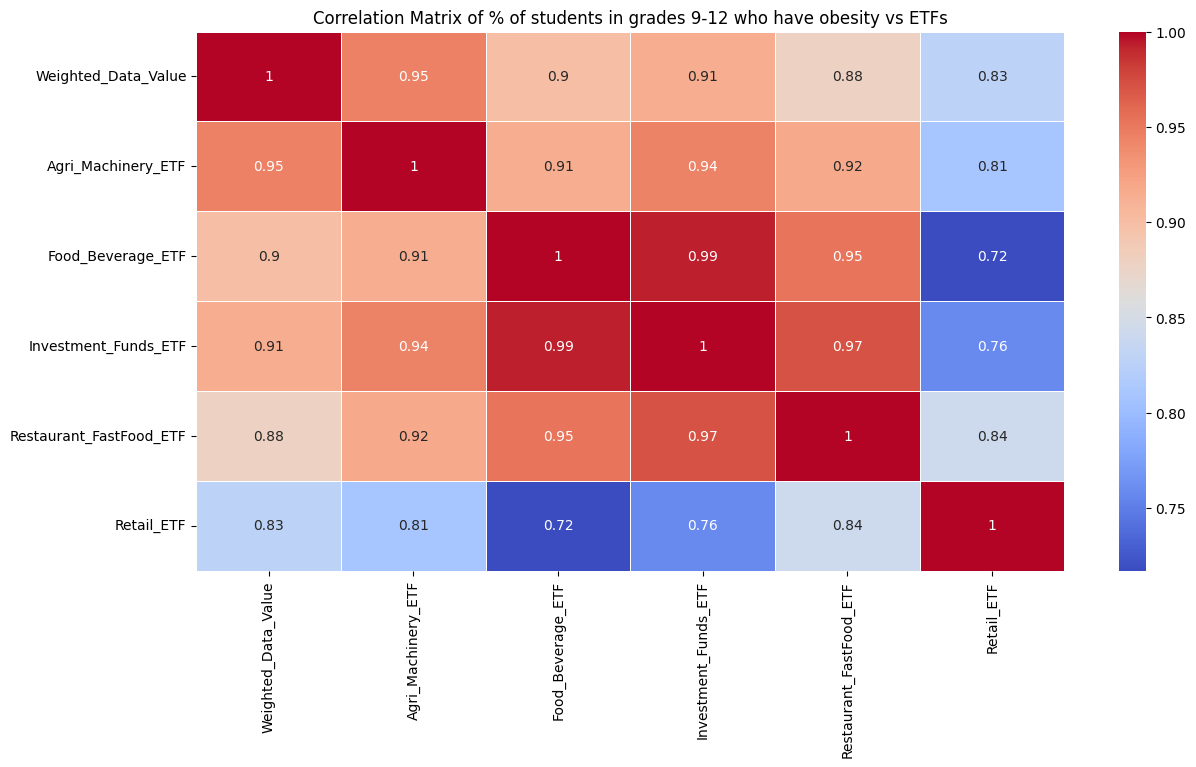

,Weighted_Data_Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Weighted_Data_Value,1.000000,0.945321,0.899848,0.914026,0.877886,0.827010
Agri_Machinery_ETF,0.945321,1.000000,0.914542,0.943806,0.917825,0.809840
Food_Beverage_ETF,0.899848,0.914542,1.000000,0.992756,0.952759,0.717155
Investment_Funds_ETF,0.914026,0.943806,0.992756,1.000000,0.971984,0.758259
Restaurant_FastFood_ETF,0.877886,0.917825,0.952759,0.971984,1.000000,0.842080
Retail_ETF,0.827010,0.809840,0.717155,0.758259,0.842080,1.000000


In [158]:
def plt_corr_matrix(df, question):
    numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Year'])    
    corr_matrix = numeric_df.corr()
    
    plt.figure(figsize=(14, 7))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Matrix of {question} vs ETFs')
    plt.show()
    
    return corr_matrix
corr_1_matrix = plt_corr_matrix(merged_1_df, "% of students in grades 9-12 who have obesity")

corr_1_matrix

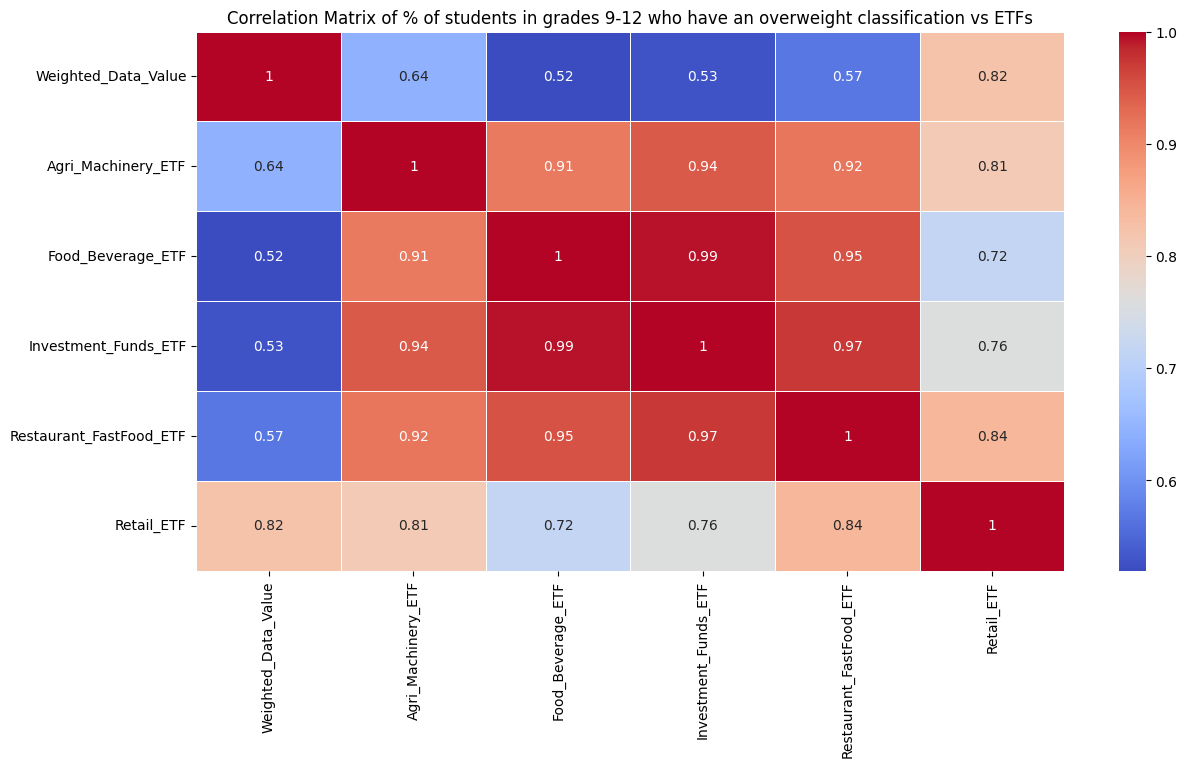

,Weighted_Data_Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Weighted_Data_Value,1.000000,0.643065,0.519575,0.528917,0.567055,0.822399
Agri_Machinery_ETF,0.643065,1.000000,0.914542,0.943806,0.917825,0.809840
Food_Beverage_ETF,0.519575,0.914542,1.000000,0.992756,0.952759,0.717155
Investment_Funds_ETF,0.528917,0.943806,0.992756,1.000000,0.971984,0.758259
Restaurant_FastFood_ETF,0.567055,0.917825,0.952759,0.971984,1.000000,0.842080
Retail_ETF,0.822399,0.809840,0.717155,0.758259,0.842080,1.000000


In [159]:
corr_2_matrix = plt_corr_matrix(merged_2_df,  "% of students in grades 9-12 who have an overweight classification")

corr_2_matrix

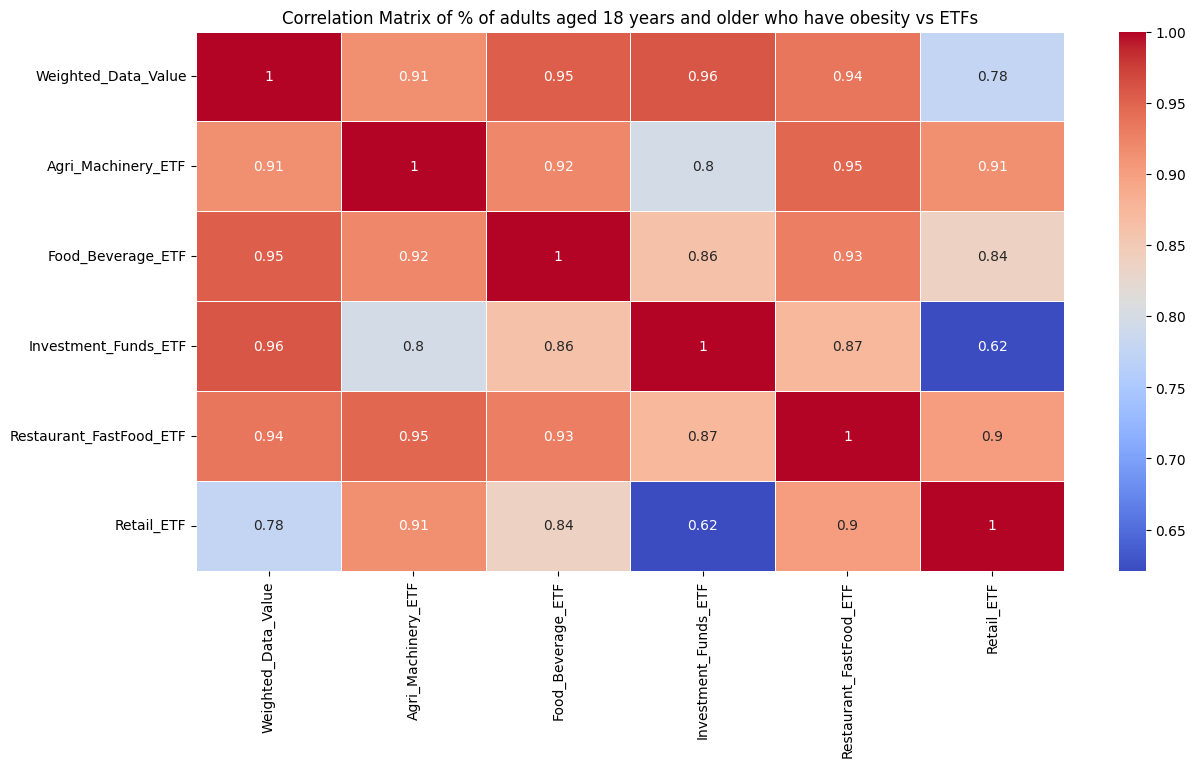

,Weighted_Data_Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Weighted_Data_Value,1.000000,0.914790,0.953843,0.959045,0.935220,0.776924
Agri_Machinery_ETF,0.914790,1.000000,0.921145,0.796383,0.947376,0.914246
Food_Beverage_ETF,0.953843,0.921145,1.000000,0.862322,0.928124,0.837565
Investment_Funds_ETF,0.959045,0.796383,0.862322,1.000000,0.873761,0.621223
Restaurant_FastFood_ETF,0.935220,0.947376,0.928124,0.873761,1.000000,0.901733
Retail_ETF,0.776924,0.914246,0.837565,0.621223,0.901733,1.000000


In [160]:
corr_3_matrix = plt_corr_matrix(merged_3_df, "% of adults aged 18 years and older who have obesity")

corr_3_matrix

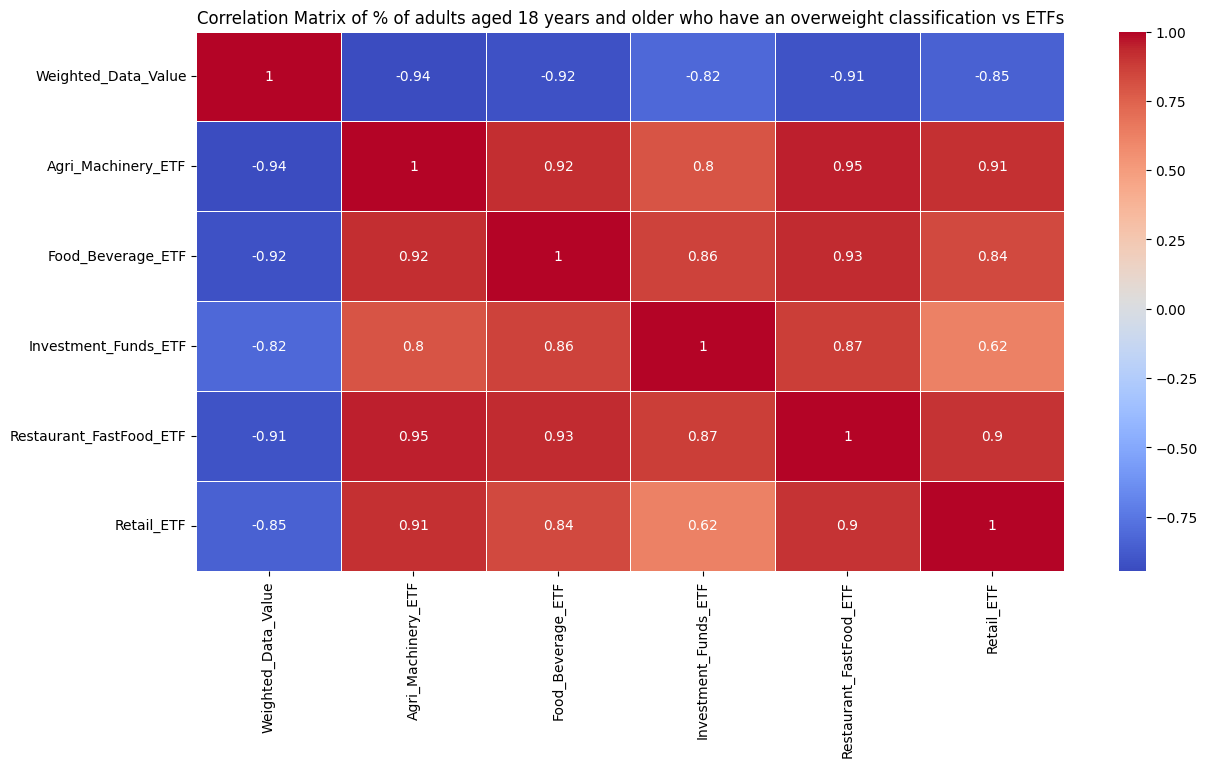

,Weighted_Data_Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Weighted_Data_Value,1.000000,-0.944036,-0.915481,-0.817144,-0.912094,-0.847731
Agri_Machinery_ETF,-0.944036,1.000000,0.921145,0.796383,0.947376,0.914246
Food_Beverage_ETF,-0.915481,0.921145,1.000000,0.862322,0.928124,0.837565
Investment_Funds_ETF,-0.817144,0.796383,0.862322,1.000000,0.873761,0.621223
Restaurant_FastFood_ETF,-0.912094,0.947376,0.928124,0.873761,1.000000,0.901733
Retail_ETF,-0.847731,0.914246,0.837565,0.621223,0.901733,1.000000


In [161]:
corr_4_matrix = plt_corr_matrix(merged_4_df, "% of adults aged 18 years and older who have an overweight classification")

corr_4_matrix

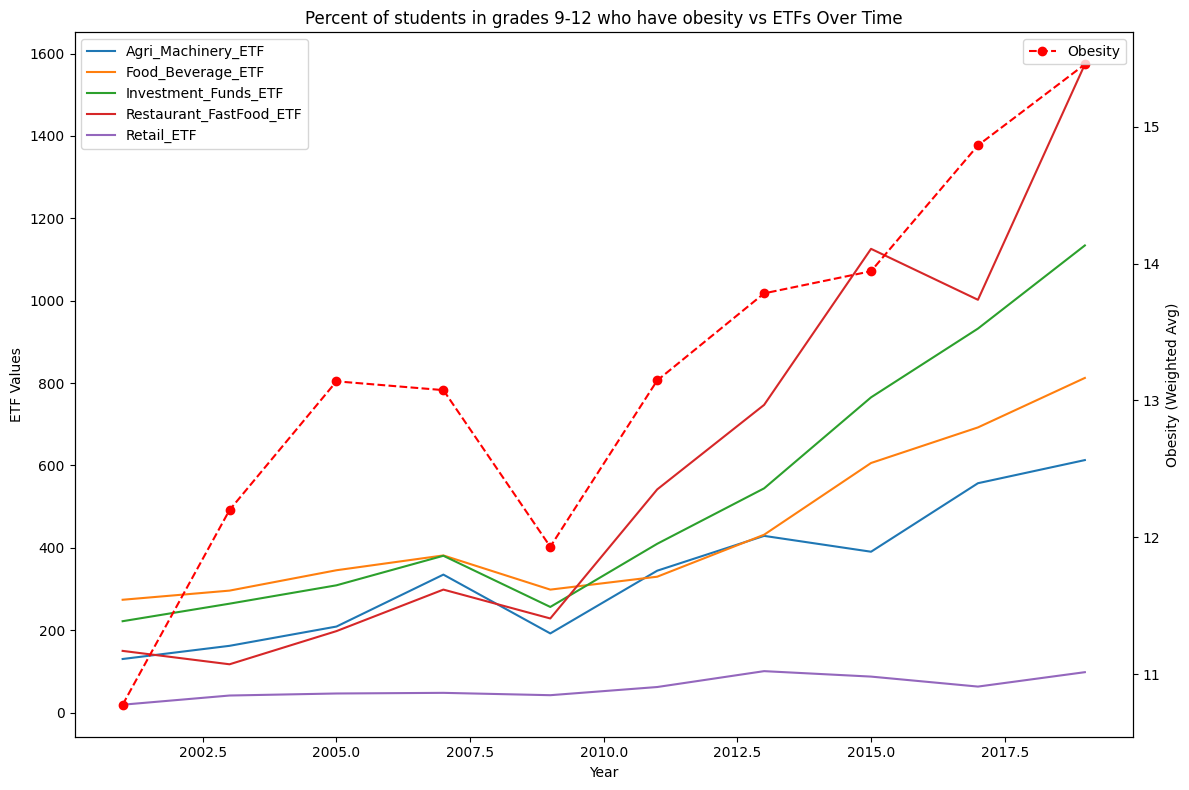

In [162]:
synth_etfs = ["Agri_Machinery_ETF", "Food_Beverage_ETF", "Investment_Funds_ETF", "Restaurant_FastFood_ETF", "Retail_ETF"]

fig, ax = plt.subplots(figsize=(12, 8))

for etf in synth_etfs:
    ax.plot(merged_1_df["Year"], merged_1_df[etf], label=etf)

ax2 = ax.twinx()
ax2.plot(merged_1_df["Year"], merged_1_df["Weighted_Data_Value"], label="Obesity", color='red', linestyle='--', marker='o')

ax.set_xlabel("Year")
ax.set_ylabel("ETF Values")
ax2.set_ylabel("Obesity (Weighted Avg)")
ax.set_title("Percent of students in grades 9-12 who have obesity vs ETFs Over Time")

etf_labels = synth_etfs + ["Obesity"]
ax.legend(loc="upper left")
ax2.legend(loc="upper right", labels=["Obesity"])

plt.tight_layout()
plt.show()

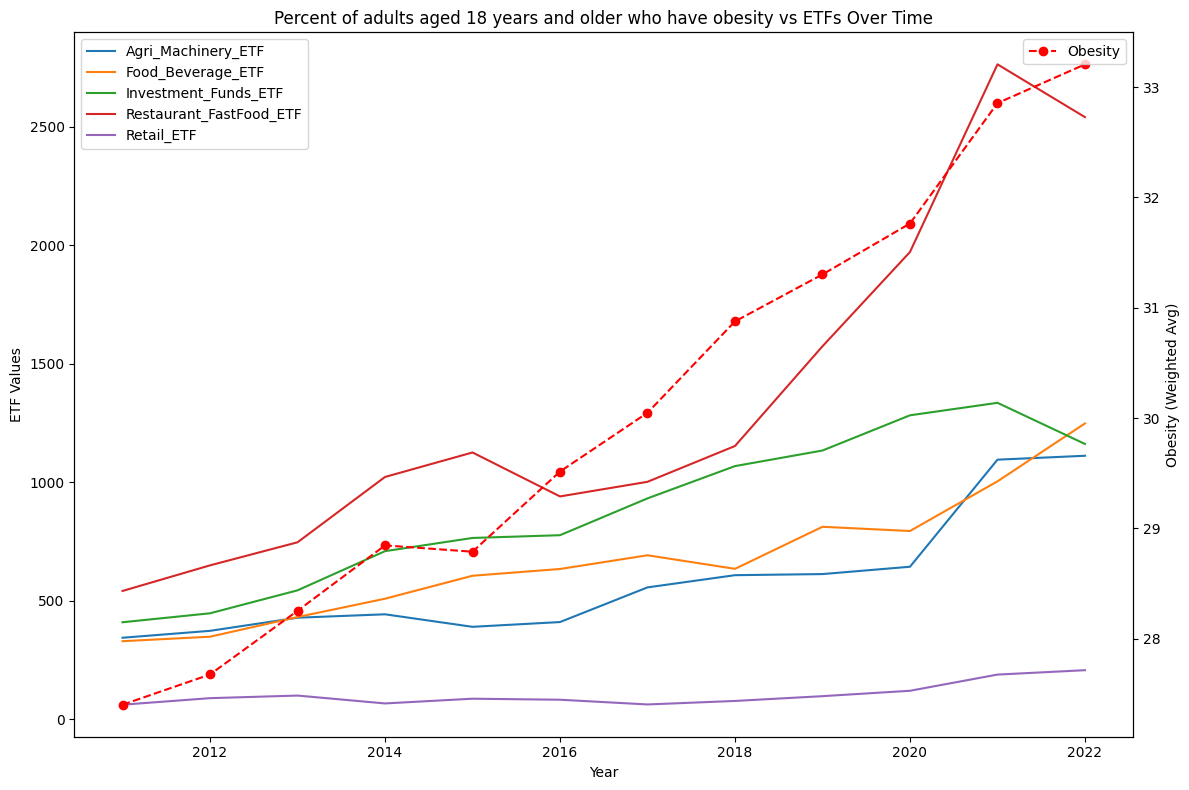

In [163]:
fig, ax = plt.subplots(figsize=(12, 8))

for etf in synth_etfs:
    ax.plot(merged_3_df["Year"], merged_3_df[etf], label=etf)

ax2 = ax.twinx()
ax2.plot(merged_3_df["Year"], merged_3_df["Weighted_Data_Value"], label="Obesity", color='red', linestyle='--', marker='o')

ax.set_xlabel("Year")
ax.set_ylabel("ETF Values")
ax2.set_ylabel("Obesity (Weighted Avg)")
ax.set_title("Percent of adults aged 18 years and older who have obesity vs ETFs Over Time")

etf_labels = synth_etfs + ["Obesity"]
ax.legend(loc="upper left")
ax2.legend(loc="upper right", labels=["Obesity"])

plt.tight_layout()
plt.show()

## Develop a model to estimate obesity rates among adults based on synthetic ETF values

* We decided upon Ridge Regression with Leave one out cross validation because there is high correlation among ETFs and limited data -> less chance of overfitting

In [164]:
X = merged_3_df[['Agri_Machinery_ETF', 'Food_Beverage_ETF', 'Investment_Funds_ETF', 'Restaurant_FastFood_ETF', 'Retail_ETF']]
Y = merged_3_df['Weighted_Data_Value']

loo = LeaveOneOut()
predictions = []
actuals = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, Y_train)
    
    y_pred = ridge.predict(X_test)
    predictions.append(y_pred[0])
    actuals.append(Y_test.values[0])

mse = mean_squared_error(actuals, predictions)
print(f'Mean Squared Error (LOOCV): {mse}')

Mean Squared Error (LOOCV): 0.11706973576300737


## Merge ETFs with Adult Obesity Demographic Data

In [165]:
def process_pd(path):
    temp_df = pd.read_csv(path)
    temp_df.rename(columns={'YearStart': 'Year'}, inplace=True)
    return merge_datasets(temp_df, etf_df)

merged_two_or_more_df = process_pd(two_or_more_races_path)
merged_american_indian_df = process_pd(american_indian_alaskan_path)
merged_asian_df = process_pd(asian_path)
merged_hawaiian_df = process_pd(hawaiian_pacific_islander_path)
merged_hispanic_df = process_pd(hispanic_path)
merged_black_df = process_pd(non_hispanic_black_path)
merged_white_df = process_pd(non_hispanic_white_path)

merged_white_df

,Year,Weighted_Data_Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
0,2011,26.2,344.579008,330.002440,409.900663,541.906769,62.210835
1,2012,26.5,373.720684,348.966480,447.735347,649.830066,89.822100
2,2013,27.1,429.103965,431.914014,544.478210,747.108615,100.741679
3,2014,27.8,443.453452,509.207540,709.749917,1022.644123,67.553056
4,2015,27.9,390.638889,606.007917,765.388137,1125.896825,87.509544
5,2016,28.6,410.773929,634.551786,777.059317,940.544365,83.190496
6,2017,29.3,556.947729,692.402131,932.296721,1002.210837,63.274223
7,2018,29.9,608.450120,635.211434,1068.443689,1153.194741,78.040837
8,2019,30.4,613.085476,812.510000,1134.157936,1573.749405,98.228016
9,2020,30.7,644.027549,794.693933,1282.648515,1971.384763,120.963300


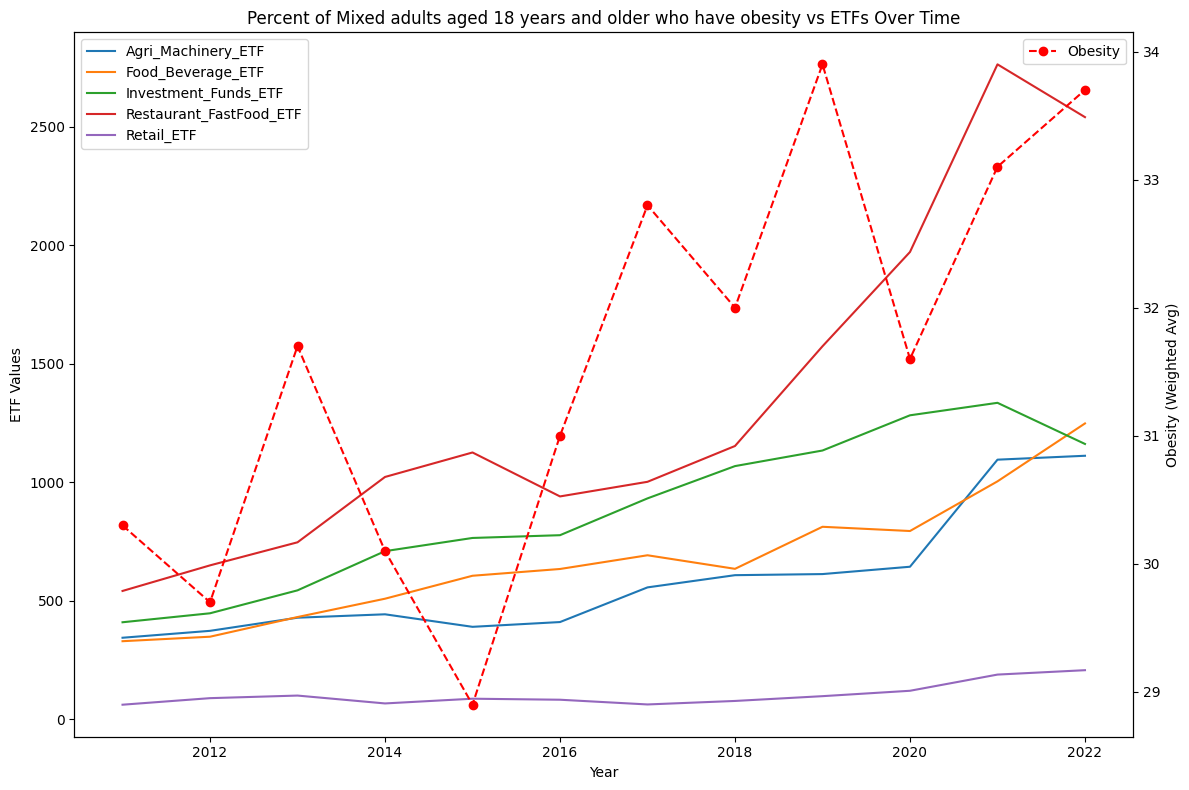

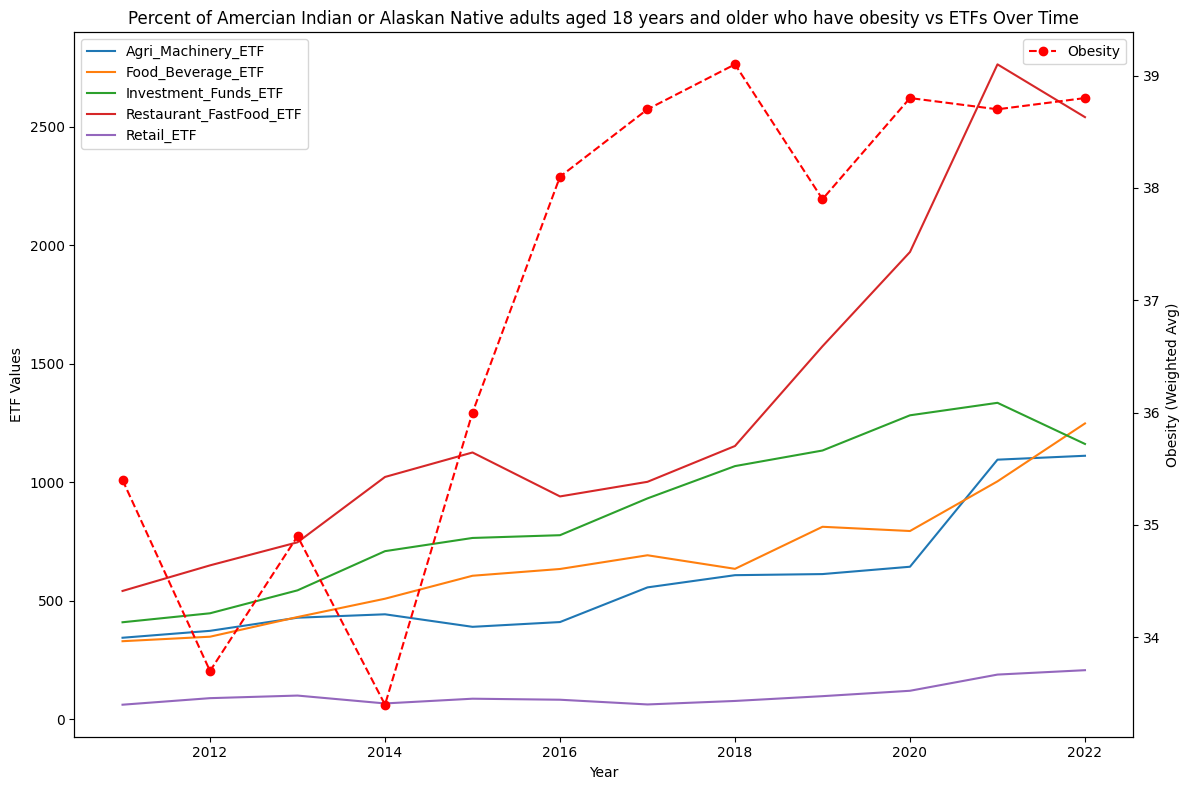

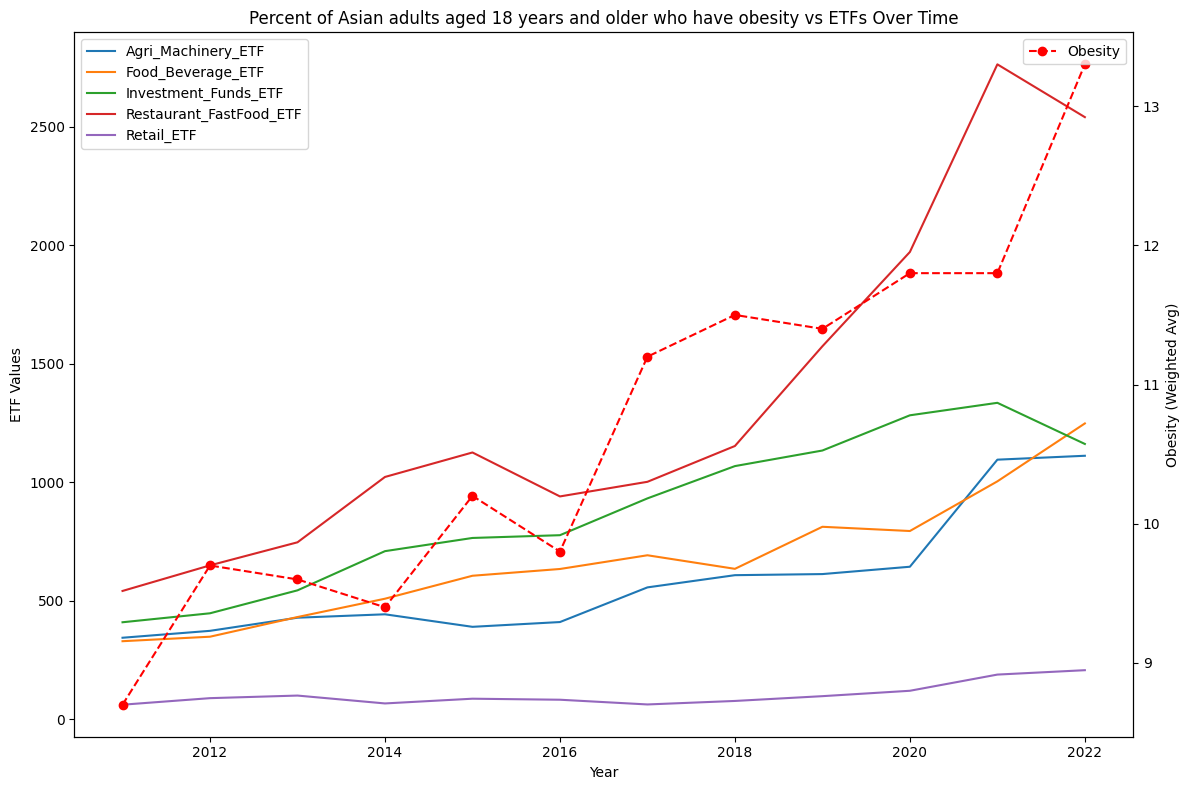

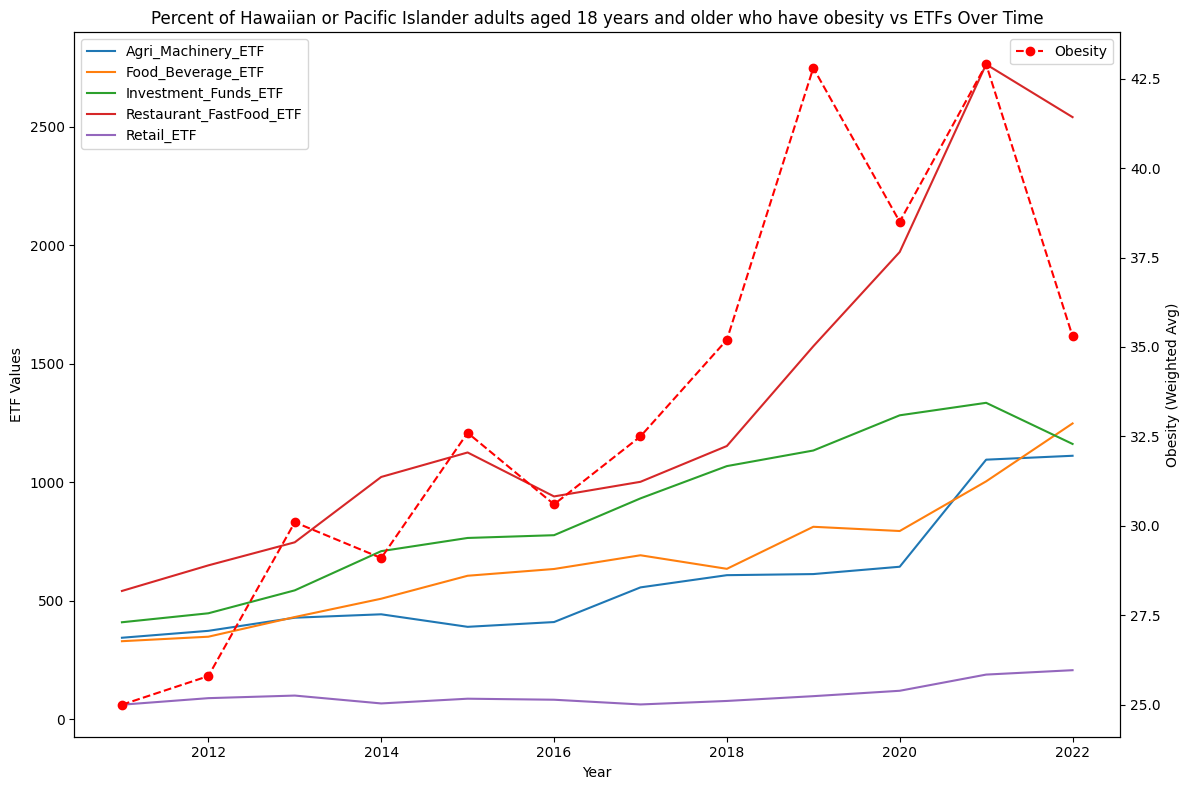

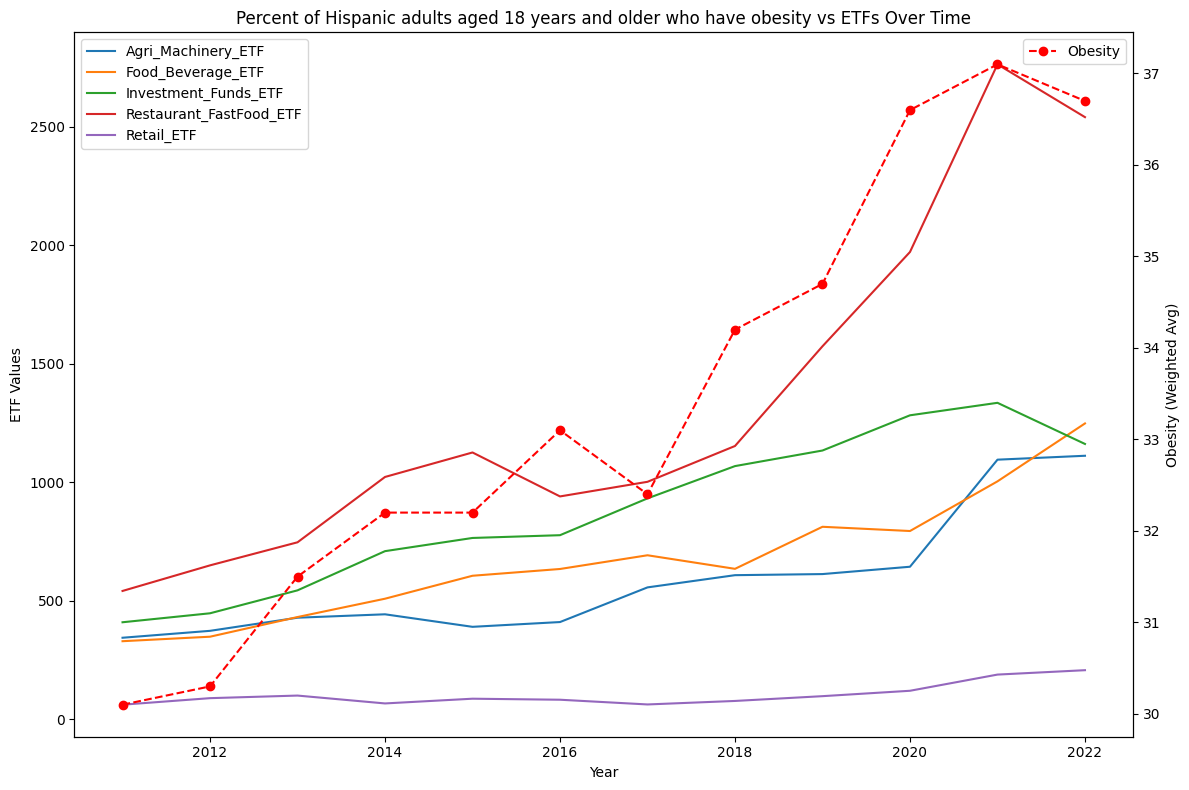

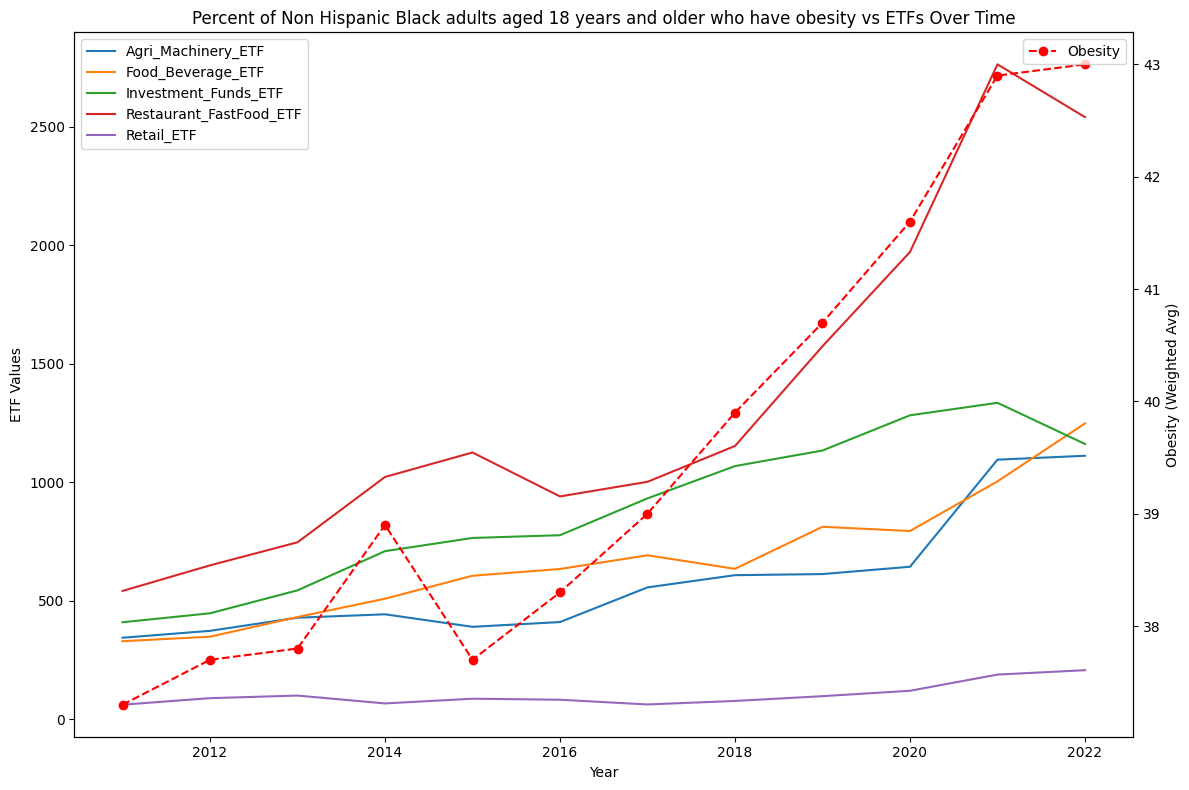

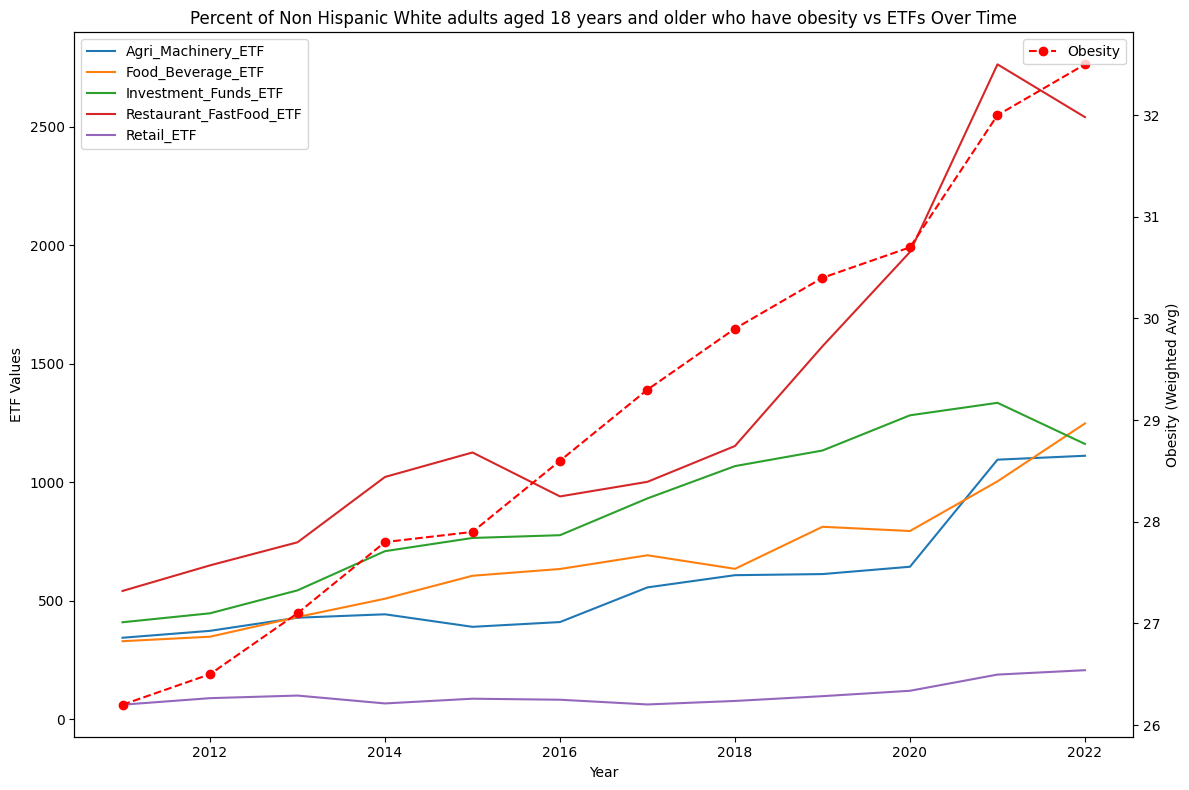

In [166]:
def plt_demographics(df, demographic):
    fig, ax = plt.subplots(figsize=(12, 8))

    for etf in synth_etfs:
        ax.plot(df["Year"], df[etf], label=etf)

    ax2 = ax.twinx()
    ax2.plot(df["Year"], df["Weighted_Data_Value"], label="Obesity", color='red', linestyle='--', marker='o')

    ax.set_xlabel("Year")
    ax.set_ylabel("ETF Values")
    ax2.set_ylabel("Obesity (Weighted Avg)")
    ax.set_title(f"Percent of {demographic} adults aged 18 years and older who have obesity vs ETFs Over Time")

    etf_labels = synth_etfs + ["Obesity"]
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right", labels=["Obesity"])

    plt.tight_layout()
    plt.show()

plt_demographics(merged_two_or_more_df, "Mixed")
plt_demographics(merged_american_indian_df, "Amercian Indian or Alaskan Native")
plt_demographics(merged_asian_df, "Asian")
plt_demographics(merged_hawaiian_df, "Hawaiian or Pacific Islander")
plt_demographics(merged_hispanic_df, "Hispanic")
plt_demographics(merged_black_df, "Non Hispanic Black")
plt_demographics(merged_white_df, "Non Hispanic White")


In [167]:
correlations = {
    "Two or More Races": merged_two_or_more_df.corr(),
    "American Indian": merged_american_indian_df.corr(),
    "Asian": merged_asian_df.corr(),
    "Hawaiian": merged_hawaiian_df.corr(),
    "Hispanic": merged_hispanic_df.corr(),
    "Black": merged_black_df.corr(),
    "White": merged_white_df.corr()
}

etfs = [
    'Agri_Machinery_ETF',
    'Food_Beverage_ETF',
    'Investment_Funds_ETF',
    'Restaurant_FastFood_ETF',
    'Retail_ETF'
]


correlation_df = pd.DataFrame(index=etfs, columns=correlations.keys())

for race, corr_df in correlations.items():
    for etf in etfs:
        correlation_df.at[etf, race] = corr_df.at['Weighted_Data_Value', etf]

correlation_df = correlation_df.astype(float)
correlation_df


,Two or More Races,American Indian,Asian,Hawaiian,Hispanic,Black,White
Agri_Machinery_ETF,0.739263,0.625400,0.863297,0.700748,0.867060,0.944030,0.913150
Food_Beverage_ETF,0.738554,0.733683,0.923580,0.756893,0.909367,0.920627,0.963148
Investment_Funds_ETF,0.707525,0.825014,0.884403,0.923273,0.961245,0.910081,0.955938
Restaurant_FastFood_ETF,0.640234,0.621751,0.847134,0.802951,0.942773,0.964085,0.929365
Retail_ETF,0.553119,0.428766,0.738757,0.565075,0.774314,0.836168,0.769740


In this section, we study the relationship between the various ETFs and the Obesity rate. There are 29 distinct ETFs of different types provided in the `all_stock_and_etfs.csv`, along with their time series data such as open, close, low, high prices within a day. For illustration purpose, we exhibit the visualization of the daily mean prices of these 29 ETFs in the Figure (TODO). It would be overcomplicated and less-intuitive if we conduct our data analysis with each ETF as a separate variable to consider, hence we grouped these ETFs into 5 clusters according to their different types as market participants, and summed the mean prices within each group as a single data point to analyze, with details provided in Table (TODO). On the other hand, we also performed some exploratory data analysis on the combined ETF prices and the obesity rate within each ethnicity group (Two or More Races, American Indian, Asian, Hawaiian, Hispanic, non-Hispanic Black, non-Hispanic White). It turns out that each ethnicity group's obesity rate roughly aligns with the growth of ETF, despite some minor fluctuation. This provides us the intuition of combining the obesity data together by taking the weighted summation of each group with weights being their population. Figure (TODO) exhibits the visualization of the relationship between the ETF prices and the weighted obesity rate. 

In [168]:
merged_two_or_more_df.rename(columns={'Weighted_Data_Value': 'Weighted_Obesity_Rate'}, inplace=True)
merged_two_or_more_df.set_index('Year', inplace=True)

merged_two_or_more_df.head()

,Weighted_Obesity_Rate,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Year,,,,,,
2011,30.3,344.579008,330.002440,409.900663,541.906769,62.210835
2012,29.7,373.720684,348.966480,447.735347,649.830066,89.822100
2013,31.7,429.103965,431.914014,544.478210,747.108615,100.741679
2014,30.1,443.453452,509.207540,709.749917,1022.644123,67.553056
2015,28.9,390.638889,606.007917,765.388137,1125.896825,87.509544


In [184]:
normalized_ETF = pd.read_csv("../etf_vs/data/etf_normalized_vs_commodities.csv")

df_filtered = normalized_ETF[(normalized_ETF['Year'] >= 2011) & (normalized_ETF['Year'] <= 2022)]
df_filtered.set_index('Year', inplace=True)
df_filtered.head()

,Unnamed: 0,Coffee,Corn,Sugar,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Year,,,,,,,,,
2011,12,271.108058,291.854083,26.235584,79.667514,44.255090,109.279008,145.421338,62.292585
2012,13,186.441583,298.437549,21.374502,87.597329,48.148766,118.940536,193.059748,89.656692
2013,14,139.484337,258.979466,17.708548,96.385283,58.923661,142.139976,230.633694,100.834668
2014,15,200.355896,192.939234,17.127041,97.784619,67.665027,177.515955,350.553272,67.455829
2015,16,159.903686,169.844637,13.215141,83.722175,82.714692,191.236654,387.937927,87.330357


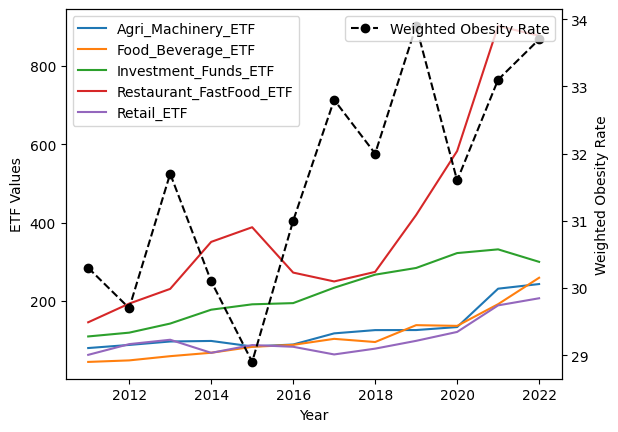

In [186]:
fig, ax1 = plt.subplots()

# Plot the ETF data
df_filtered[['Agri_Machinery_ETF', 'Food_Beverage_ETF', 'Investment_Funds_ETF', 'Restaurant_FastFood_ETF', 'Retail_ETF']].plot(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('ETF Values')
ax1.legend(loc='upper left')

# Create a secondary y-axis for the Weighted Obesity Rate
ax2 = ax1.twinx()
merged_two_or_more_df['Weighted_Obesity_Rate'].plot(ax=ax2, color='black', linestyle='--', marker='o')
ax2.set_ylabel('Weighted Obesity Rate')
ax2.legend(['Weighted Obesity Rate'], loc='upper right')

#plt.title('Various ETFs and Weighted Obesity Rate')
plt.show()

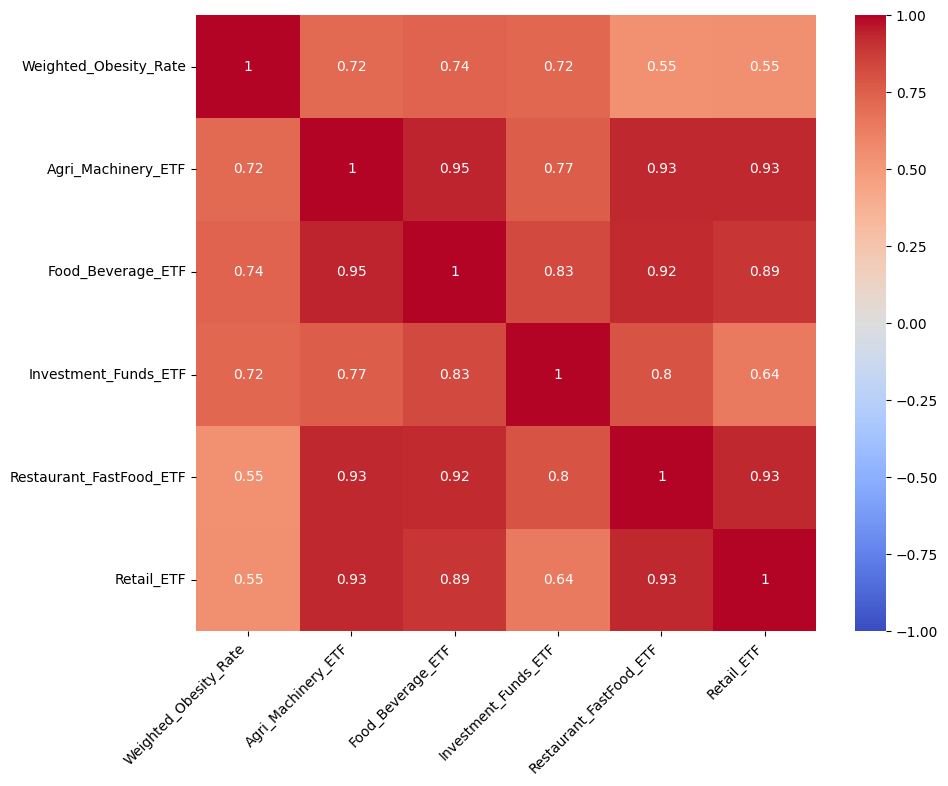

In [189]:
columns_to_replace = ['Agri_Machinery_ETF', 'Food_Beverage_ETF', 'Investment_Funds_ETF', 'Restaurant_FastFood_ETF', 'Retail_ETF']
merged_two_or_more_df[columns_to_replace] = df_filtered[columns_to_replace]
corr_matrix = merged_two_or_more_df.corr()
corr_matrix = corr_matrix.drop('const', axis=0).drop('const', axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [190]:
merged_two_or_more_df = sm.add_constant(merged_two_or_more_df)
X = merged_two_or_more_df[['Agri_Machinery_ETF', 'Food_Beverage_ETF', 'Investment_Funds_ETF', 'Restaurant_FastFood_ETF', 'Retail_ETF']]
Y = merged_two_or_more_df['Weighted_Obesity_Rate']
model = sm.OLS(Y, X).fit()
print(model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Weighted_Obesity_Rate   R-squared (uncentered):                   0.978
Model:                               OLS   Adj. R-squared (uncentered):              0.963
Method:                    Least Squares   F-statistic:                              63.22
Date:                   Sat, 03 Aug 2024   Prob (F-statistic):                    1.13e-05
Time:                           20:34:25   Log-Likelihood:                         -35.474
No. Observations:                     12   AIC:                                      80.95
Df Residuals:                          7   BIC:                                      83.37
Df Model:                              5                                                  
Covariance Type:               nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975

/Users/tony/myenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


From this point on we use the normalized ETF and see if there is a better result for regression model.

In [173]:
normalized_ETF = pd.read_csv("../etf_vs/data/etf_normalized_vs_commodities.csv")
